In [38]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
api = requests.get('https://api.biorxiv.org/covid19/0')
data = api.json()

In [28]:
total_num_files = data['messages'][0]['total']

pages = total_num_files // 30
if total_num_files % 30 > 0:
    pages += 1

## Get all the APIs

In [29]:
all_collections = []
for i in range(pages):
    if i % 10 == 0:
        print("page", i, "out of", pages)
    myJson = requests.get('https://api.biorxiv.org/covid19/' + str(i * 30)).json()
    all_collections.append(myJson['collection'])

page 0 out of 309
page 10 out of 309
page 20 out of 309
page 30 out of 309
page 40 out of 309
page 50 out of 309
page 60 out of 309
page 70 out of 309
page 80 out of 309
page 90 out of 309
page 100 out of 309
page 110 out of 309
page 120 out of 309
page 130 out of 309
page 140 out of 309
page 150 out of 309
page 160 out of 309
page 170 out of 309
page 180 out of 309
page 190 out of 309
page 200 out of 309
page 210 out of 309
page 220 out of 309
page 230 out of 309
page 240 out of 309
page 250 out of 309
page 260 out of 309
page 270 out of 309
page 280 out of 309
page 290 out of 309
page 300 out of 309


In [30]:
all_articles_info = [None] * total_num_files
i = 0
for collection in all_collections:
    for article in collection:
        all_articles_info[i] = article
        i += 1

## Conctatenate all the articles in a  single DF
As well as the authors with their corresponging institution

In [205]:
df = None
df_authors = None

articles = [None] * total_num_files
authors = [None] * total_num_files * 1000
a = 0
for j, art in enumerate(all_articles_info):
    if ((j + 1) % 500 == 0 or j + 1 == total_num_files):
        print(j + 1, "out of", total_num_files)
        print(art['rel_doi'])
    rel_authors = art['rel_authors']
    names = [""] * len(rel_authors)
    instits = []
    for n, author in enumerate(rel_authors):
        names[n] = author['author_name']
        inst = author["author_inst"]
        author_info = {"Author": author["author_name"], "Institution": inst}
        author_df = pd.DataFrame(author_info, index = [0]).set_index("Author")
        authors[a] = author_df
        a += 1
        if inst not in instits:
            instits.append(inst)
    tempDf = pd.DataFrame(art).drop("rel_authors", axis = 1).drop_duplicates()
    tempDf["Authors"] = [names]
    tempDf["Institutions"] = [instits]
    articles[j] = tempDf
df = pd.concat(articles)
df_authors = pd.concat(authors)

500 out of 9256
10.1101/2020.09.16.297366
1000 out of 9256
10.1101/2020.08.27.20068346
1500 out of 9256
10.1101/2020.08.14.20175299
2000 out of 9256
10.1101/2020.08.04.235002
2500 out of 9256
10.1101/2020.07.15.20154955
3000 out of 9256
10.1101/2020.07.09.195008
3500 out of 9256
10.1101/2020.06.25.172510
4000 out of 9256
10.1101/2020.06.14.20131318
4500 out of 9256
10.1101/2020.06.03.20121459
5000 out of 9256
10.1101/2020.05.22.20106294
5500 out of 9256
10.1101/2020.05.15.20102715
6000 out of 9256
10.1101/2020.05.07.20094466
6500 out of 9256
10.1101/2020.04.28.20083956
7000 out of 9256
10.1101/2020.04.22.055327
7500 out of 9256
10.1101/2020.04.12.20062646
8000 out of 9256
10.1101/2020.03.30.20047365
8500 out of 9256
10.1101/2020.03.20.20040048
9000 out of 9256
10.1101/2020.02.23.20024802
9256 out of 9256
10.1101/782409


In [206]:
column_names = {'rel_doi': 'DOI',
                'rel_title': 'Title',
                'rel_date':'Date',
                'rel_site':'Site',
                'rel_link':'Link',
                'rel_abs':'Abstract',
                'rel_num_authors':'Num Authors'}
df = df.rename(columns = column_names)
df_authors = df_authors.drop_duplicates()
df_authors = df_authors.reset_index()

## Saving the Data Frames as csv

In [1]:
df.to_csv(r'covid-19_research.csv', index = False, header = True)

NameError: name 'df' is not defined

In [208]:
df_authors.drop_duplicates().to_csv(r'covid-19_authors.csv', index = False, header = True)

In [4]:
df_authors = pd.read_csv('covid-19_authors.csv')
print('num dif authors', df_authors['Author'].drop_duplicates().shape[0])
print('num dif institutions', df_authors['Institution'].drop_duplicates().shape[0])
print('num dif authors and institutions', df_authors.shape[0])

num dif authors 21856
num dif institutions 23935
num dif authors and institutions 23938


# Find countries mentioned in the abstract of each article

In [5]:
df = pd.read_csv('covid-19_research.csv')
df.head(3)

,DOI,Title,Date,Site,Link,Abstract,Num Authors,version,license,type,category,Authors,Institutions
0,10.1101/2020.10.02.20199083,Performance of a rapid SARS-COV-2 serology tes...,2020-10-02,medRxiv,https://medrxiv.org/cgi/content/short/2020.10....,Rapid SARS-COV-2 related serology testing can ...,1,1,cc_no,PUBLISHAHEADOFPRINT,infectious diseases,['Sasank Vemulapati'],['Hermes Life Sciences']
1,10.1101/2020.10.01.20203711,Impact of COVID-19 lockdown on psychosocial fa...,2020-10-02,medRxiv,https://medrxiv.org/cgi/content/short/2020.10....,Background: Little is known about effects of C...,9,1,cc_by,PUBLISHAHEADOFPRINT,epidemiology,"['Adele M Taylor', 'Danielle Page', 'Judith A ...","['The University of Edinburgh', 'University of..."
2,10.1101/2020.10.01.20205146,An Integrated Framework with Machine Learning ...,2020-10-02,medRxiv,https://medrxiv.org/cgi/content/short/2020.10....,Early diagnosis of COVID-19 is considered the ...,6,1,cc_no,PUBLISHAHEADOFPRINT,radiology and imaging,"['Mahbubunnabi Tamal', 'Maha Alshammari', 'Mee...","['Imam Abdulrahman Bin Faisal University, Damm..."


In [6]:
co = pd.read_csv('countries of the world.csv')
countries = list(co['Country'].str.strip())

In [177]:
abstracts = df['Abstract']
dict_countries = {}
all_dois_country = [None] * len(countries)
for i, country in enumerate(countries):
    filt = (abstracts.str.find(country) > -1)
    times_ment = abstracts[filt].count()
    all_dois_country[i] = list(df[filt]['DOI'])
    dict_countries[country] = times_ment

In [178]:
country_appears = sorted(list(dict_countries.items()), key = lambda x:x[1], reverse = True)
toDF = {'Country': list(dict_countries.keys()), 'Times Mentioned': list(dict_countries.values())}
toDF["DOIs"] = all_dois_country
countryDf = pd.DataFrame(toDF).sort_values('Times Mentioned', ascending = False)
countryDf.to_csv(r'covid-19_Countries_Mentioned.csv', index = False, header = True)

In [7]:
countryDf = pd.read_csv("covid-19_Countries_Mentioned.csv")
countryDf.head(10)

,Country,Times Mentioned,DOIs
0,China,1243,"['10.1101/2020.10.01.20205021', '10.1101/2020...."
1,Italy,433,"['10.1101/2020.09.29.20204289', '10.1101/2020...."
2,United States,393,"['10.1101/2020.10.01.20205021', '10.1101/2020...."
3,India,334,"['10.1101/2020.10.01.20205021', '10.1101/2020...."
4,Spain,240,"['10.1101/2020.10.01.20205021', '10.1101/2020...."
5,Brazil,203,"['10.1101/2020.10.01.20205120', '10.1101/2020...."
6,Germany,191,"['10.1101/2020.10.02.20188136', '10.1101/2020...."
7,France,177,"['10.1101/2020.09.29.20203760', '10.1101/2020...."
8,Japan,128,"['10.1101/2020.09.27.20202739', '10.1101/2020...."
9,Iran,107,"['10.1101/2020.10.01.20205021', '10.1101/2020...."


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most mentioned countries')

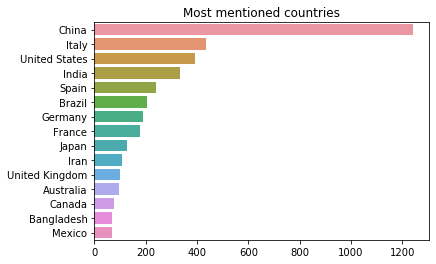

In [60]:
top = 15
ax = sns.barplot(list(countryDf['Times Mentioned'][:top]), list(countryDf['Country'][:top]))
plt.title("Most mentioned countries")

## Get the papers each Author contributed to

In [ ]:
authors = pd.read_csv('covid-19_authors.csv')['Author'].drop_duplicates()
dois_and_authors = df['Authors']
dict_authors = {}
all_authors_dois = [None] * authors.shape[0]
for i, author in enumerate(authors):
    if (i + 1) % 2000 == 0:
        print(i + 1, "out of", authors.shape[0])
    space = " "
    filt = dois_and_authors.str.find(author) >= 0
    counter = dois_and_authors[filt].count()
    all_authors_dois[i] = list(df[filt]['DOI'])
    dict_authors[author] = counter

In [268]:
aut = list(dict_authors.keys())
count = list(dict_authors.values())
all_authors = pd.DataFrame({"Author":aut,
                            "Num of Papers":count,
                            "DOIs":all_authors_dois}).sort_values("Num of Papers", ascending = False)
all_authors.to_csv('Authors_with_papers.csv', index = False, header = True)


In [48]:
all_authors = pd.read_csv("Authors_with_papers.csv")

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

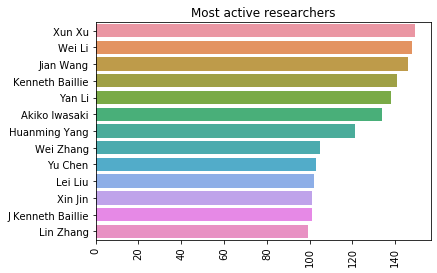

In [64]:
top = 13
ax = sns.barplot(list(all_authors['Num of Papers'][:top]), list(all_authors['Author'][:top]))
plt.title("Most active researchers")
plt.xticks(rotation = 90)

## Get the papers published by each institution
This probably has some bugs, since it reads - and Italy as Insitutions

In [ ]:
insts = pd.read_csv('covid-19_authors.csv')['Institution'].drop_duplicates()
dois_and_insts = df['Institutions']
dict_insts = {}
all_insts_dois = [None] * insts.shape[0]
for i, inst in enumerate(insts):
    if (i + 1) % 2000 == 0:
        print(i + 1, "out of", insts.shape[0])
    try:
        filt = dois_and_insts.str.find(inst) >= 0
        counter = dois_and_insts[filt].count()
        dict_insts[inst] = (counter, list(df[filt]['DOI']))
    except:
        continue

In [280]:
institutions = list(dict_insts.keys())
count_and_dois = list(dict_insts.values())
all_institutions = pd.DataFrame({"Institution":institutions,
                                 "info":count_and_dois})
#
#all_institutions = pd.read_csv("Institutions_with_papers.csv")
all_institutions["Num of Papers"] = all_institutions["info"].apply(lambda x: x[0])
all_institutions["DOIs"] = all_institutions["info"].apply(lambda x: x[1])
all_institutions = all_institutions.drop("info", axis = 1)

In [282]:
all_institutions.sort_values("Num of Papers", ascending = False).to_csv('Institutions_with_papers.csv', index = False, header = True)

In [52]:
all_institutions = pd.read_csv("Institutions_with_papers.csv")[4:]
all_institutions.head(10)

,Institution,Num of Papers,DOIs
4,University of California,1080,"['10.1101/2020.10.02.323915', '10.1101/2020.09..."
5,University of Oxford,995,"['10.1101/2020.10.02.20198663', '10.1101/2020...."
6,NHS,958,"['10.1101/2020.10.02.20205641', '10.1101/2020...."
7,Harvard,786,"['10.1101/2020.09.30.20199828', '10.1101/2020...."
8,Imperial,718,"['10.1101/2020.09.30.20204727', '10.1101/2020...."
9,Imperial College,714,"['10.1101/2020.09.30.20204727', '10.1101/2020...."
10,Mount Sinai,703,"['10.1101/2020.10.01.20205088', '10.1101/2020...."
11,Italy,669,"['10.1101/2020.09.30.20204560', '10.1101/2020...."
12,University of Science and Technology,665,"['10.1101/2020.09.30.20204644', '10.1101/2020...."
13,Dr,650,"['10.1101/2020.09.29.20201509', '10.1101/2020...."


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text xticklabel objects>)

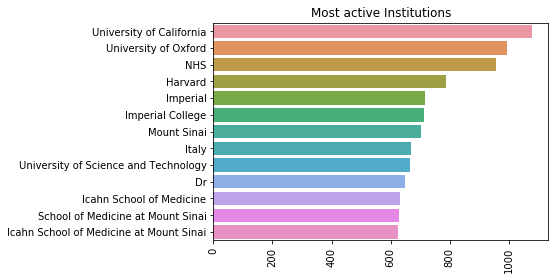

In [63]:
top = 13
ax = sns.barplot(list(all_institutions['Num of Papers'][:top]), list(all_institutions['Institution'][:top]))
plt.title("Most active Institutions")
plt.xticks(rotation = 90)